In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

print("Libraries loaded successfully!")


Libraries loaded successfully!


In [3]:
# Yeh tumhara downloads folder ka path hai
folder_path = r"C:\Users\rajiv\Downloads"

# Check karo ki folder exist karta hai ya nahi
if os.path.exists(folder_path):
    print("✅ Folder found:", folder_path)
else:
    print("❌ Folder path not found!")


✅ Folder found: C:\Users\rajiv\Downloads


In [4]:
files = os.listdir(folder_path)
all_matches = []

for file in files:
    if file.endswith(".json"):
        file_path = os.path.join(folder_path, file)
        with open(file_path, 'r') as f:
            match_data = json.load(f)
            all_matches.append(match_data)

print("Total matches loaded:", len(all_matches))


Total matches loaded: 0


In [5]:
files = os.listdir(folder_path)
all_matches = []

for file in files:
    if file.endswith(".json"):
        file_path = os.path.join(folder_path, file)
        with open(file_path, 'r') as f:
            match_data = json.load(f)
            all_matches.append(match_data)

print("Total matches loaded:", len(all_matches))



Total matches loaded: 0


In [6]:
print(os.listdir(folder_path))


['.ipynb_checkpoints', 'desktop.ini', 'pycharm-2025.1.2.exe', 'pycharm-community-edition-2025.1.1.1-installer.exe', 'pycharm-community-edition-2025.1.1.1-installer_sT-NcI1.exe', 'python-3.13.5-amd64.exe', 't20s_json', 't20s_json.zip', 'Unconfirmed 938680.crdownload', 'Untitled.ipynb', 'Untitled1.ipynb']


In [7]:
folder_path = r"C:\Users\rajiv\Downloads\t20s_json"


In [8]:
print(os.listdir(folder_path))


['1001349.json', '1001351.json', '1001353.json', '1004729.json', '1007655.json', '1007657.json', '1007659.json', '1019979.json', '1019981.json', '1019983.json', '1020029.json', '1031431.json', '1031433.json', '1031435.json', '1031665.json', '1034825.json', '1034827.json', '1034829.json', '1041615.json', '1041617.json', '1043989.json', '1043991.json', '1043993.json', '1044211.json', '1050217.json', '1050219.json', '1050221.json', '1050615.json', '1065348.json', '1072316.json', '1072317.json', '1072318.json', '1072319.json', '1072320.json', '1072321.json', '1072322.json', '1074957.json', '1074959.json', '1074961.json', '1074964.json', '1074965.json', '1074966.json', '1074968.json', '1074970.json', '1075507.json', '1075508.json', '1077947.json', '1077948.json', '1083449.json', '1083450.json', '1085495.json', '1085496.json', '1086067.json', '1086068.json', '1086069.json', '1089202.json', '1089203.json', '1089243.json', '1098211.json', '1109610.json', '1115798.json', '1115799.json', '111580

In [9]:
files = os.listdir(folder_path)
all_matches = []

for file in files:
    if file.endswith(".json"):
        file_path = os.path.join(folder_path, file)
        with open(file_path, 'r') as f:
            match_data = json.load(f)
            all_matches.append(match_data)

print("Total matches loaded:", len(all_matches))


Total matches loaded: 4342


In [10]:
balls = []

for match in all_matches:
    for inning in match["innings"]:
        team = inning["team"]
        for over in inning["overs"]:
            over_num = over["over"]
            for delivery in over["deliveries"]:
                batter = delivery["batter"]
                bowler = delivery["bowler"]
                runs = delivery["runs"]["batter"]
                date = match["info"]["dates"][0]

                balls.append({
                    "team": team,
                    "over": over_num,
                    "batter": batter,
                    "bowler": bowler,
                    "runs": runs,
                    "date": date
                })

df = pd.DataFrame(balls)
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year

print("✅ DataFrame created successfully!")
print(df.head())


✅ DataFrame created successfully!
        team  over     batter      bowler  runs       date  year
0  Australia     0   AJ Finch  SL Malinga     0 2017-02-17  2017
1  Australia     0   AJ Finch  SL Malinga     0 2017-02-17  2017
2  Australia     0   AJ Finch  SL Malinga     1 2017-02-17  2017
3  Australia     0  M Klinger  SL Malinga     2 2017-02-17  2017
4  Australia     0  M Klinger  SL Malinga     0 2017-02-17  2017


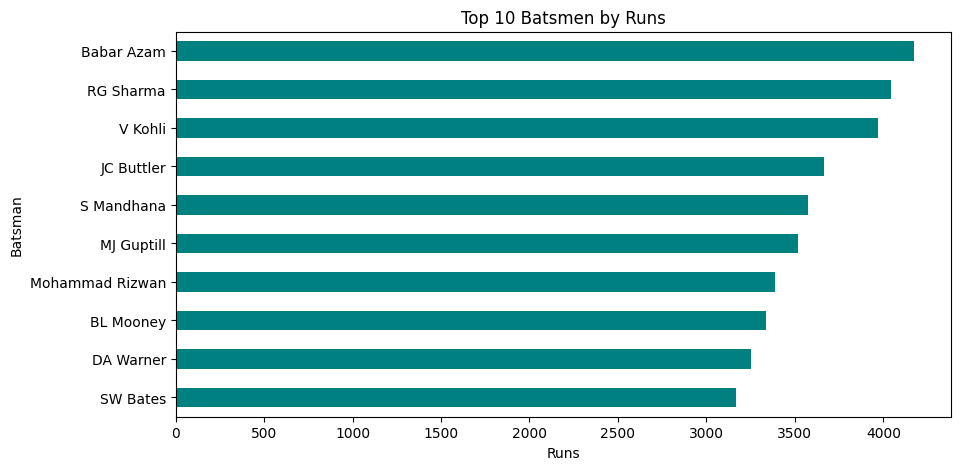

In [11]:
import matplotlib.pyplot as plt

# Top 10 batsmen by total runs
top_batsmen = df.groupby("batter")["runs"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_batsmen.plot(kind='barh', color='teal')
plt.title("Top 10 Batsmen by Runs")
plt.xlabel("Runs")
plt.ylabel("Batsman")
plt.gca().invert_yaxis()
plt.show()


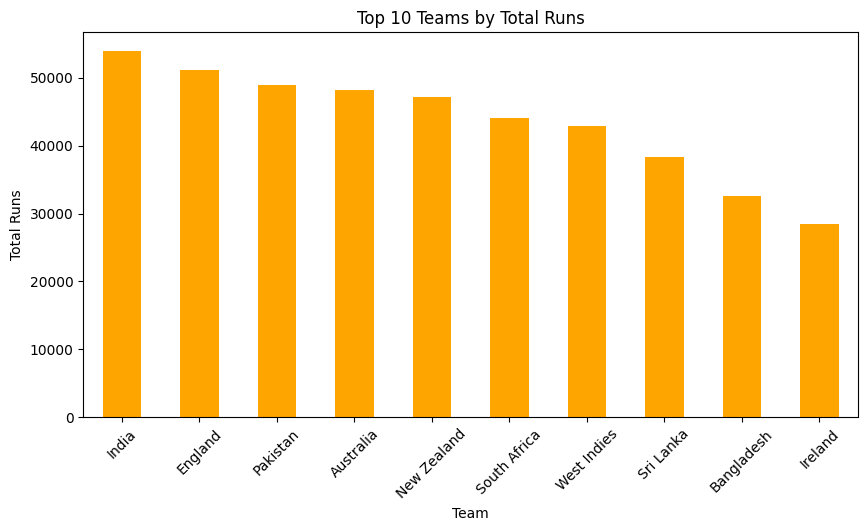

In [12]:
# Top 10 teams by total runs
team_runs = df.groupby("team")["runs"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
team_runs.head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Teams by Total Runs")
plt.ylabel("Total Runs")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()


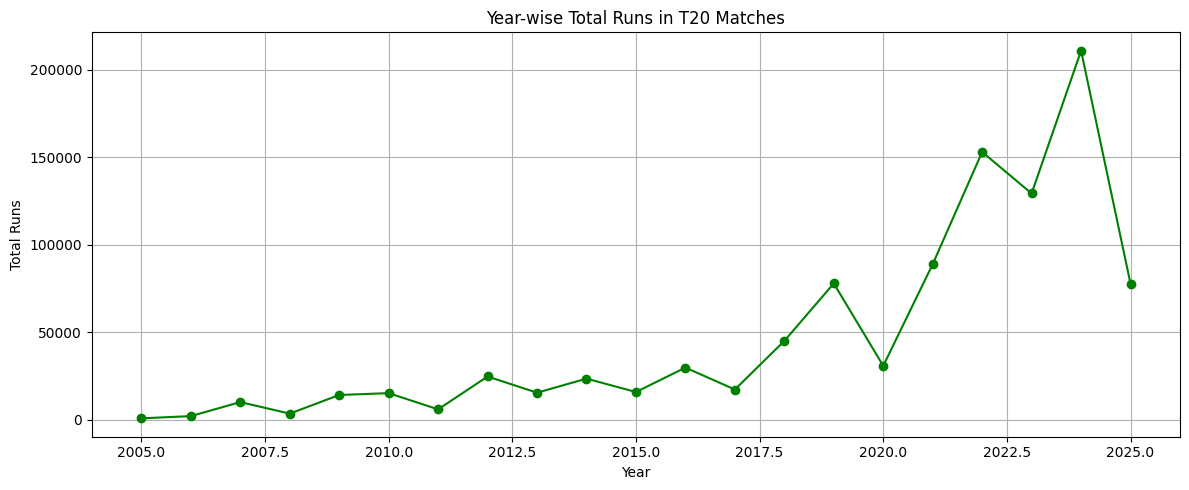

In [13]:
# Year-wise total runs
year_runs = df.groupby("year")["runs"].sum().sort_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(year_runs.index, year_runs.values, marker='o', color='green')
plt.title("Year-wise Total Runs in T20 Matches")
plt.xlabel("Year")
plt.ylabel("Total Runs")
plt.grid(True)
plt.tight_layout()
plt.show()
